# AI Lab Final
## Name : Areeb Ajab
## Reg No : FA20-BSE-132

## Necessary Imports

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import os

## Loading data set and prepocessing

In [2]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

170498071/170498071 [==============================] - 4s 0us/step


### Normalizing dataset

In [3]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Spliting train and test data

In [4]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

### Data Augmentation

In [5]:
# Define data augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip('horizontal'),
  layers.RandomRotation(0.2),
])

## Building our CNN Model

In [7]:
# Build the CNN model architecture
model = models.Sequential([
  data_augmentation,
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
input_shape = (None, 32, 32, 3)
model.build(input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)         

### Traing Model

In [11]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 13s 6ms/step - loss: 1.7986 - accuracy: 0.3413 - val_loss: 1.5202 - val_accuracy: 0.4550
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5404 - accuracy: 0.4455 - val_loss: 1.4289 - val_accuracy: 0.5044
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4139 - accuracy: 0.4943 - val_loss: 1.2816 - val_accuracy: 0.5444
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3360 - accuracy: 0.5251 - val_loss: 1.1895 - val_accuracy: 0.5794
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2862 - accuracy: 0.5420 - val_loss: 1.3181 - val_accuracy: 0.5346
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2434 - accuracy: 0.5584 - val_loss: 1.1521 - val_accuracy: 0.5943
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2058 - accuracy: 0.5711 - val_loss: 1.2288 - val_accuracy

### Evaluating  model and saving

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')
# Save the model
model.save('model/my_mode.h5')

313/313 [==============================] - 1s 3ms/step - loss: 1.1284 - accuracy: 0.6047
Test Accuracy: 0.6047000288963318


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Pridicting our model results

1/1 [==============================] - 0s 315ms/step


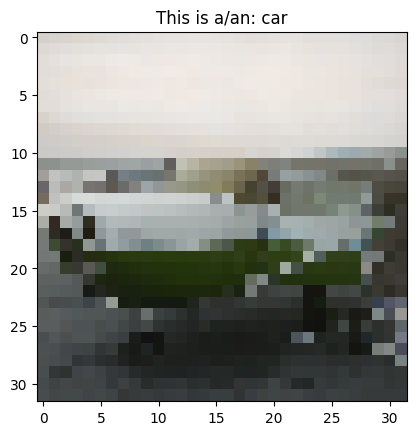

1/1 [==============================] - 0s 20ms/step


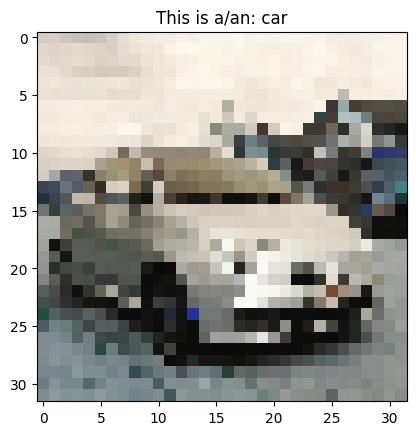

1/1 [==============================] - 0s 24ms/step


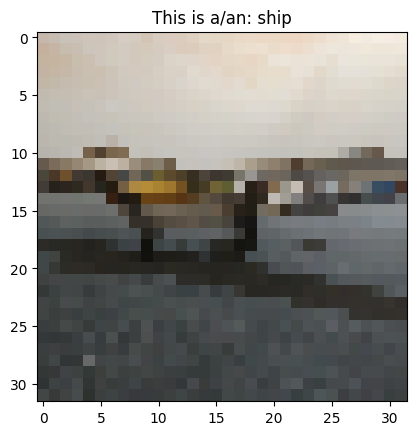

1/1 [==============================] - 0s 18ms/step


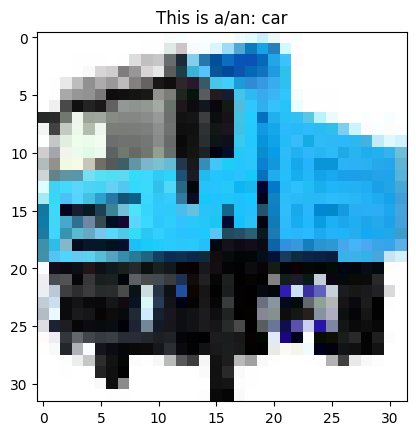

In [15]:
# preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Path to the folder containing the images
image_directory = '/content/sample_data/Images'

image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Load the trained model
loaded_model = tf.keras.models.load_model('model/my_mode.h5')


for image_file in image_files:

    # Preprocess the image
    image = preprocess_image(image_file)

    # Make predictions
    predictions = loaded_model.predict(image)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Class names for CIFAR-10 dataset
    class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Print the predicted class and its name
    predicted_class_name = class_names[predicted_class_index]
#

    # Display the image and the predicted class name
    plt.imshow(image.squeeze())
    plt.title(f'This is a/an: {predicted_class_name}')
    plt.show()
